In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [ ]:
!pip install cooler

In [ ]:
!pip install hicrep
!pip install cooltools

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

import cooler
import cooltools
import cooltools.lib.plotting
from cooltools import insulation

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
!gdown "https://drive.google.com/uc?id=1U07cwQ3rTDtU_SoC2c9evOY6669tr55s" -O hicdata/HiC1.mcool
!gdown "https://drive.google.com/uc?id=1YpD20Qa-pNc0bxQQiLz2KRee3xZZJ5UU" -O hicdata/HiC2.mcool
!gdown "https://drive.google.com/uc?id=1V1XfLjVcp2cc88rC6YTS8f5f9-ksfW0c" -O hicdata/HiC3.mcool
!gdown "https://drive.google.com/uc?id=1yqJKIntuaKnIGjUvlnuLi7vlO8Lno7f5" -O hicdata/HiC4.mcool
resolution = 10000


Downloading...
From (original): https://drive.google.com/uc?id=1U07cwQ3rTDtU_SoC2c9evOY6669tr55s
From (redirected): https://drive.google.com/uc?id=1U07cwQ3rTDtU_SoC2c9evOY6669tr55s&confirm=t&uuid=67455645-a9c3-4cb2-a336-fd747a05e9c6
To: /content/hicdata/HiC1.mcool
100% 124M/124M [00:00<00:00, 134MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1YpD20Qa-pNc0bxQQiLz2KRee3xZZJ5UU
From (redirected): https://drive.google.com/uc?id=1YpD20Qa-pNc0bxQQiLz2KRee3xZZJ5UU&confirm=t&uuid=1b091f87-f58c-47b1-a81b-670eb6e5307c
To: /content/hicdata/HiC2.mcool
100% 127M/127M [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V1XfLjVcp2cc88rC6YTS8f5f9-ksfW0c
To: /content/hicdata/HiC3.mcool
100% 104M/104M [00:01<00:00, 91.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1yqJKIntuaKnIGjUvlnuLi7vlO8Lno7f5
From (redirected): https://drive.google.com/uc?id=1yqJKIntuaKnIGjUvlnuLi7vlO8Lno7f5&confirm=t&uuid=05d506d0-1276-43a8-858a-9f008c4824a4
To: 

In [9]:
clr = cooler.Cooler(f'hicdata/HiC1.mcool::resolutions/{resolution}')

##cooler

In [10]:
clr.info

{'bin-size': 10000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:38:39.059783',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 12044,
 'nchroms': 7,
 'nnz': 11146004,
 'storage-mode': 'symmetric-upper',
 'sum': 63912926}

In [11]:
clr.chromnames

['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrM']

In [12]:
clr.chroms()[:]

,name,length
0,chr2L,23011544
1,chr2R,21146708
2,chr3L,24543557
3,chr3R,27905053
4,chr4,1351857
5,chrX,22422827
6,chrM,19517


In [15]:
matrix = clr.matrix(balance=True).fetch('chr3R')
matrix

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan, 1.02035516, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

##maitrix

In [39]:
matrix = clr.matrix(balance=True).fetch("chr3R:3,000,000-4,500,000")
matrix

array([[4.45700652e-01, 6.26738632e-02, 3.61003704e-02, ...,
        2.43964015e-04, 5.39189641e-04, 7.28716223e-04],
       [6.26738632e-02, 6.12068206e-01, 8.32487317e-02, ...,
        1.64469365e-04, 7.26993919e-04, 6.55022801e-04],
       [3.61003704e-02, 8.32487317e-02, 4.70033273e-01, ...,
        1.36087500e-04, 1.20307858e-04, 6.77484952e-04],
       ...,
       [2.43964015e-04, 1.64469365e-04, 1.36087500e-04, ...,
        4.11368705e-01, 8.89197802e-02, 2.74594140e-02],
       [5.39189641e-04, 7.26993919e-04, 1.20307858e-04, ...,
        8.89197802e-02, 3.95944731e-01, 6.69104432e-02],
       [7.28716223e-04, 6.55022801e-04, 6.77484952e-04, ...,
        2.74594140e-02, 6.69104432e-02, 4.40430948e-01]])

Сбалансированность матрицы мы можем изменять с помощью параметра **balance**🫡. Он принимает два значения true, false для сбалансированной и не сбалансированной матрицы соответственно.

##contacts

In [17]:
! cooler dump -b -t pixels --header --join -r chr3L hicdata/HiC1.mcool::resolutions/10000 | head

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr3L	10000	20000	chr3L	10000	20000	41	
chr3L	10000	20000	chr3L	20000	30000	43	
chr3L	10000	20000	chr3L	30000	40000	1	
chr3L	10000	20000	chr3L	50000	60000	1	
chr3L	10000	20000	chr3L	80000	90000	1	
chr3L	10000	20000	chr3L	100000	110000	1	
chr3L	10000	20000	chr3L	140000	150000	1	
chr3L	10000	20000	chr3L	180000	190000	1	
chr3L	10000	20000	chr3L	210000	220000	1	


 Посмотрим на heatmap для balance and not balance matrix.

<ipython-input-29-c07942b974e9>:2: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(matrix), cmap='inferno')


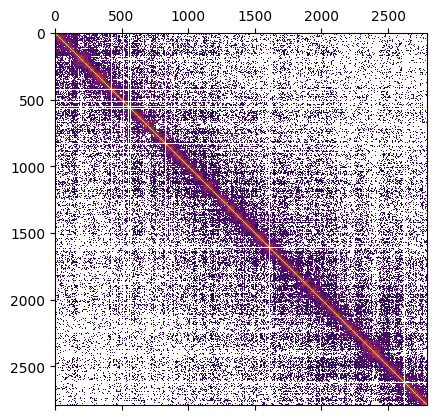

In [29]:
matrix = clr.matrix(balance=True).fetch('chr3R')
plt.matshow(np.log10(matrix), cmap='inferno')

<ipython-input-41-b994b97d3621>:2: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(matrix), cmap='inferno')


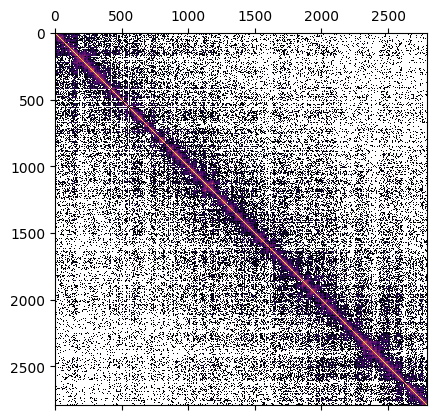

In [41]:
matrix = clr.matrix(balance=False).fetch('chr3R')
plt.matshow(np.log10(matrix), cmap='inferno')

In [31]:
clr.matrix(balance=True, as_pixels=True, join=True).fetch("chr3R:3,000,000-4,500,000")

,chrom1,start1,end1,chrom2,start2,end2,count,balanced
0,chr3R,3000000,3010000,chr3R,3000000,3010000,3471,0.445701
1,chr3R,3000000,3010000,chr3R,3010000,3020000,362,0.062674
2,chr3R,3000000,3010000,chr3R,3020000,3030000,252,0.036100
3,chr3R,3000000,3010000,chr3R,3030000,3040000,126,0.023361
4,chr3R,3000000,3010000,chr3R,3040000,3050000,142,0.020490
...,...,...,...,...,...,...,...,...
10064,chr3R,4470000,4480000,chr3R,4480000,4490000,868,0.088920
10065,chr3R,4470000,4480000,chr3R,4490000,4500000,238,0.027459
10066,chr3R,4480000,4490000,chr3R,4480000,4490000,4372,0.395945
10067,chr3R,4480000,4490000,chr3R,4490000,4500000,656,0.066910


<ipython-input-42-f5b7d79e3a84>:2: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(mat), cmap='inferno')


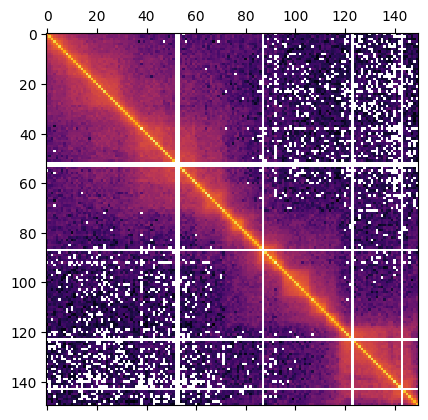

In [42]:
mat = clr.matrix(balance=True).fetch("chr3R:3,000,000-4,500,000")
plt.matshow(np.log10(mat), cmap='inferno')

#cooler dump

In [44]:
! cooler dump -b -t pixels --header --join -r chr3R:3,000,000-4,500,000 hicdata/HiC1.mcool::resolutions/20000 | head

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr3R	3000000	3020000	chr3R	3000000	3020000	6455	0.624612
chr3R	3000000	3020000	chr3R	3020000	3040000	950	0.100589
chr3R	3000000	3020000	chr3R	3040000	3060000	416	0.0473233
chr3R	3000000	3020000	chr3R	3060000	3080000	486	0.0338024
chr3R	3000000	3020000	chr3R	3080000	3100000	173	0.0192381
chr3R	3000000	3020000	chr3R	3100000	3120000	178	0.0166652
chr3R	3000000	3020000	chr3R	3120000	3140000	118	0.0129272
chr3R	3000000	3020000	chr3R	3140000	3160000	100	0.0103071
chr3R	3000000	3020000	chr3R	3160000	3180000	55	0.00806885


In [46]:
clr.bins().fetch('chr3R')

,chrom,start,end,weight
6872,chr3R,0,10000,0.028950
6873,chr3R,10000,20000,NaN
6874,chr3R,20000,30000,0.024755
6875,chr3R,30000,40000,NaN
6876,chr3R,40000,50000,0.012701
...,...,...,...,...
9658,chr3R,27860000,27870000,0.016336
9659,chr3R,27870000,27880000,0.015574
9660,chr3R,27880000,27890000,0.019198
9661,chr3R,27890000,27900000,0.021336


Получим таблицу с бинами, где есть: номер бина, геномные координаты, вес для балансировки матрицы.

##graph

HiC1 и HiC2 совпадают

HiC3 и HiC4 совпадают

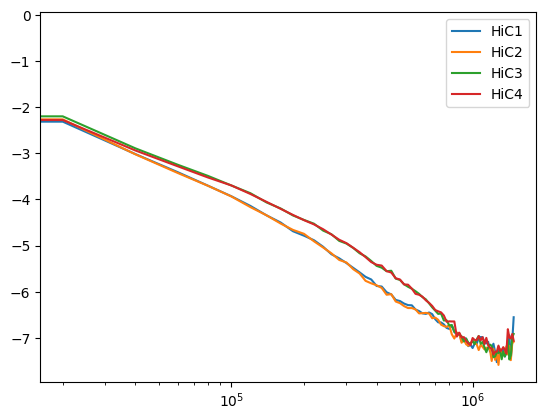

In [59]:
resolution = 20000
for i in range(1, 5):
  clr = cooler.Cooler(f'hicdata/HiC{i}.mcool::resolutions/{resolution}')
  m = clr.matrix(balance=True).fetch("chr3R:3,000,000-4,500,000")
  z=np.zeros(len(m))
  for j in range(len(m)):
    z[j]=np.nanmean(np.diagonal(m,j))
  plt.plot(np.arange(len(m))*resolution, np.log(z), label=f"HiC{i}")

plt.xscale('log')
plt.legend()

plt.show()

##insulation score graph


In [63]:
from matplotlib.ticker import EngFormatter
import itertools
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe

In [61]:
resolution = 10000
res = {}
for i in range(1, 5):
  clr = cooler.Cooler(f'hicdata/HiC{i}.mcool::resolutions/{resolution}')
  windows = [3*resolution, 5*resolution, 10*resolution]
  res[i] = insulation(clr, windows, verbose=True)



INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM
INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM
INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM
INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Pro

In [62]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im


bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

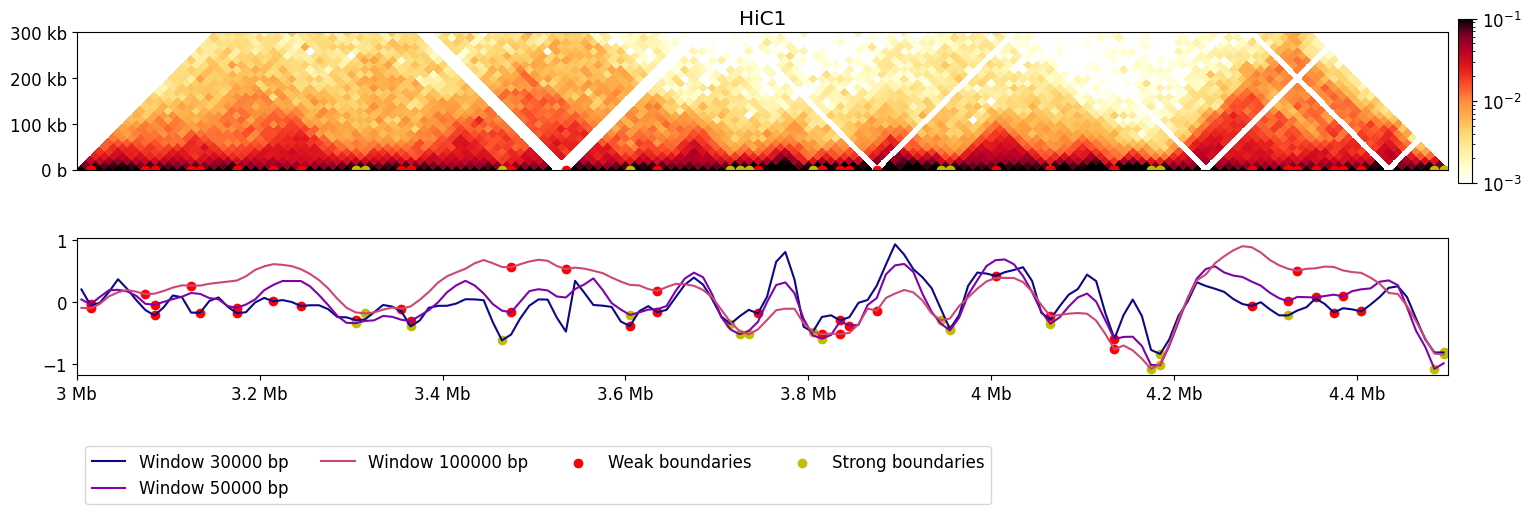

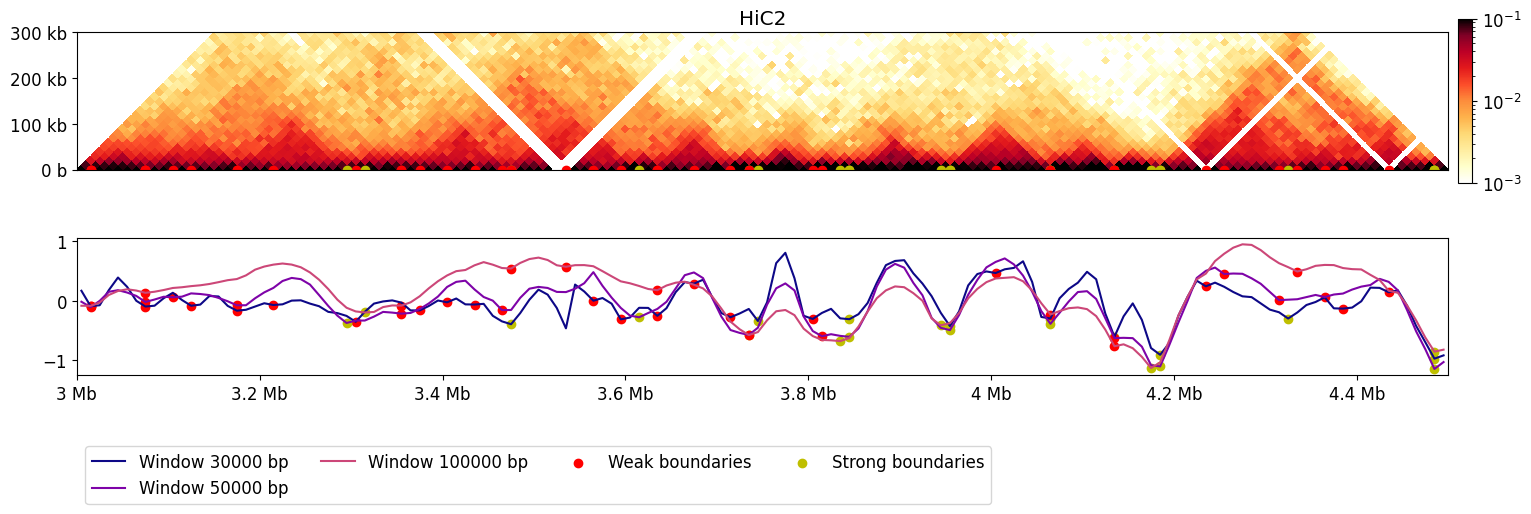

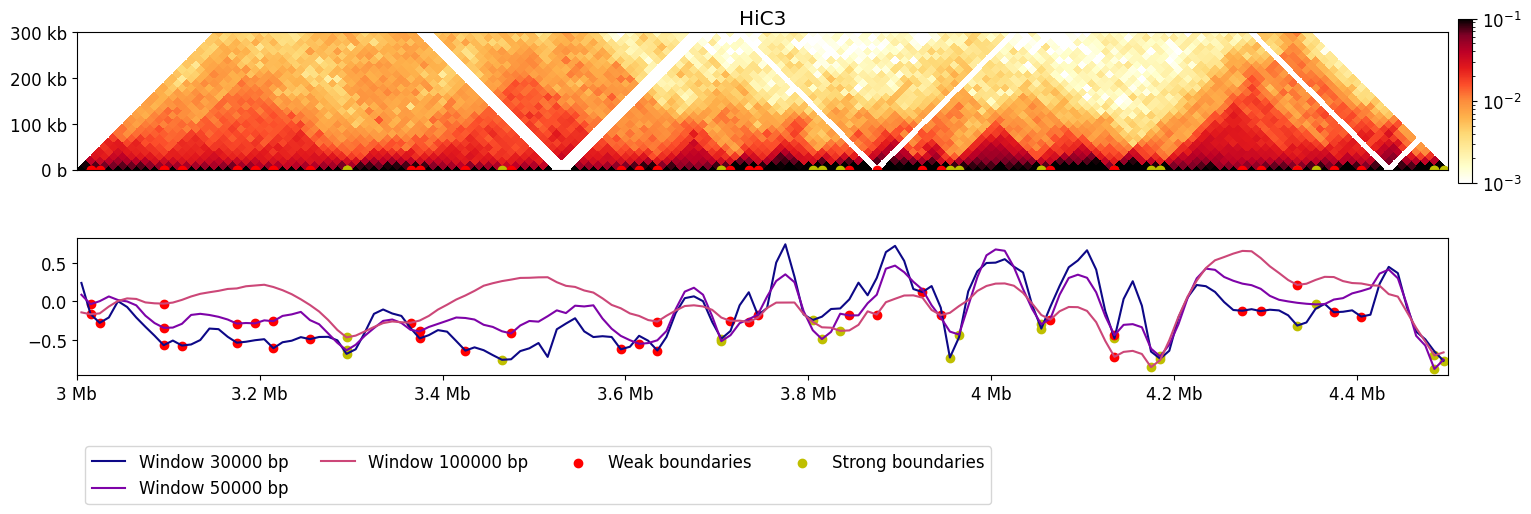

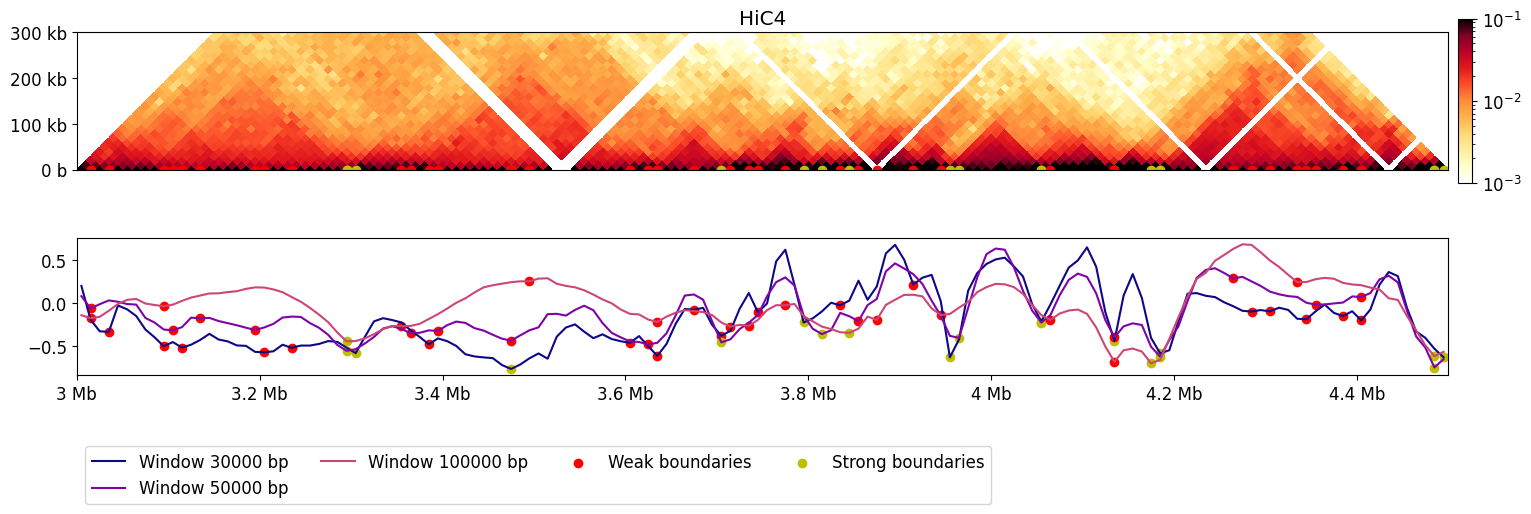

In [75]:
plt.rcParams['font.size'] = 12

start = 3000000
end = 4500000
window = windows[0]

for i in range(1, 5):
    clr = cooler.Cooler(f'hicdata/HiC{i}.mcool::resolutions/{resolution}')

    region = ('chr3R', start, end)
    norm = LogNorm(vmax=0.1, vmin=0.001)
    data = clr.matrix(balance=True).fetch(region)
    f, ax = plt.subplots(figsize=(18, 6))
    im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
    ax.set_aspect(0.5)
    ax.set_ylim(0, 10*windows[0])
    format_ticks(ax, rotate=False)
    ax.xaxis.set_visible(False)
    ax.set_title(f'HiC{i}')

    insul_region = bioframe.select(res[i], region)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
    plt.colorbar(im, cax=cax)

    ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
    ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
    for window in windows:
      boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{window}'])]

      weak_boundaries = boundaries[~boundaries[f'is_boundary_{window}']]
      strong_boundaries = boundaries[boundaries[f'is_boundary_{window}']]
      ax.scatter(
          weak_boundaries[['start', 'end']].mean(axis=1),
          [0 for i in range(weak_boundaries.shape[0])],
          color='r',
          )

      ax.scatter(
          strong_boundaries[['start', 'end']].mean(axis=1),
          [0 for i in range(strong_boundaries.shape[0])],
          color='y'
          )

      ins_ax.plot(
          insul_region[['start', 'end']].mean(axis=1),
          insul_region[f'log2_insulation_score_{window}'],
          label=f'Window {window} bp'
          )

      ins_ax.scatter(
          weak_boundaries[['start', 'end']].mean(axis=1),
          weak_boundaries[f'log2_insulation_score_{window}'],
          color='r',
          )

      ins_ax.scatter(
          strong_boundaries[['start', 'end']].mean(axis=1),
          strong_boundaries[f'log2_insulation_score_{window}'],
          color='y',
          )

    ins_ax.scatter([], [], color="r", label="Weak boundaries")
    ins_ax.scatter([], [], color="y", label="Strong boundaries")

    ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

    format_ticks(ins_ax, y=False, rotate=False)
    ax.set_xlim(region[1], region[2])
    plt.show()

In [66]:
!mkdir TADs

In [72]:
for i in range(1, 5):
    insulation = bioframe.select(res[i], region)
    boundaries = insulation[~np.isnan(insulation[f'boundary_strength_{window}'])]

    with open(f'TADs/TAD_borders_{i}.bed', "w") as files:
        for _, row in boundaries.iterrows():
            score = 'strong' if row[f'is_boundary_{window}'] else 'weak'
            files.write(f"{row['region']}\t{row['start']}\t{row['end']}\t{score}\n")